In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [3]:
df = pd.read_csv("cleaned_energy_data.csv", parse_dates=['DateTime'])
df.set_index('DateTime', inplace=True)

df.head()


,Unnamed: 0,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
DateTime,,,,,,,,
2006-12-16 17:24:00,0,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,1,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,2,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,3,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,4,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [3]:
df['hour'] = df.index.hour
df['dayofweek'] = df.index.dayofweek
df['month'] = df.index.month
df['is_weekend'] = df['dayofweek'].isin([5,6]).astype(int)

df[['hour','dayofweek','month','is_weekend']].head()


,hour,dayofweek,month,is_weekend
DateTime,,,,
2006-12-16 17:24:00,17,5,12,1
2006-12-16 17:25:00,17,5,12,1
2006-12-16 17:26:00,17,5,12,1
2006-12-16 17:27:00,17,5,12,1
2006-12-16 17:28:00,17,5,12,1


In [4]:
df['total_energy'] = (
    df['Sub_metering_1'] +
    df['Sub_metering_2'] +
    df['Sub_metering_3']
)

df[['Sub_metering_1','Sub_metering_2','Sub_metering_3','total_energy']].head()


,Sub_metering_1,Sub_metering_2,Sub_metering_3,total_energy
DateTime,,,,
2006-12-16 17:24:00,0.0,1.0,17.0,18.0
2006-12-16 17:25:00,0.0,1.0,16.0,17.0
2006-12-16 17:26:00,0.0,2.0,17.0,19.0
2006-12-16 17:27:00,0.0,1.0,17.0,18.0
2006-12-16 17:28:00,0.0,1.0,17.0,18.0


In [5]:
df['lag_1_hour'] = df['total_energy'].shift(1)
df['lag_1_day'] = df['total_energy'].shift(24)


In [6]:
df['rolling_mean_24'] = df['total_energy'].rolling(24).mean()
df['rolling_std_24'] = df['total_energy'].rolling(24).std()


In [7]:
df.dropna(inplace=True)

df.shape


(2075235, 16)

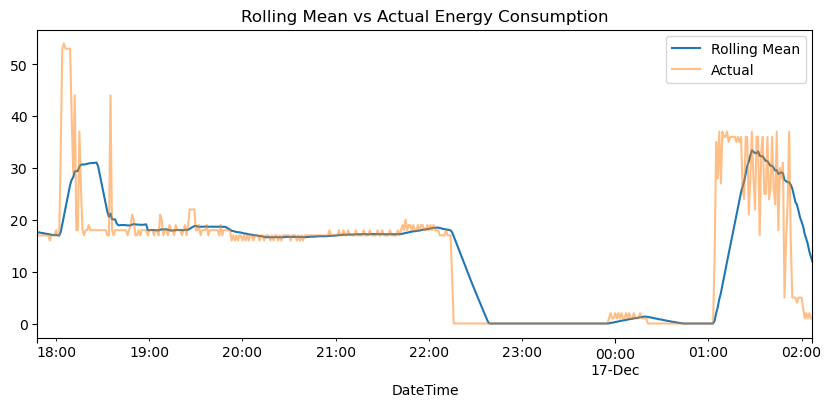

In [8]:
plt.figure(figsize=(10,4))
df['rolling_mean_24'][:500].plot(label='Rolling Mean')
df['total_energy'][:500].plot(alpha=0.5, label='Actual')
plt.legend()
plt.title("Rolling Mean vs Actual Energy Consumption")
plt.show()


In [9]:
X = df[
    ['hour','dayofweek','month','is_weekend',
     'lag_1_hour','lag_1_day',
     'rolling_mean_24','rolling_std_24']
]

y = df['total_energy']


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [11]:
model = LinearRegression()
model.fit(X_train, y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [12]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE :", mae)
print("RMSE:", rmse)


MAE : 1.3481996629267983
RMSE: 3.118808073469979


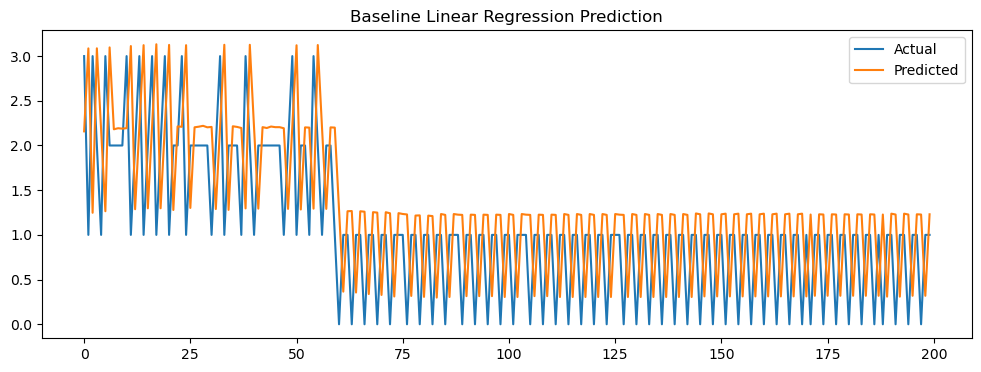

In [13]:
plt.figure(figsize=(12,4))
plt.plot(y_test.values[:200], label='Actual')
plt.plot(y_pred[:200], label='Predicted')
plt.legend()
plt.title("Baseline Linear Regression Prediction")
plt.show()
